In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pprint
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [3]:
from sklearn.model_selection import train_test_split

X_data = bostonDF.drop('PRICE',axis=1)
y_data = bostonDF['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.2)

C:\Users\YDH\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == '__main__':
C:\Users\YDH\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\YDH\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


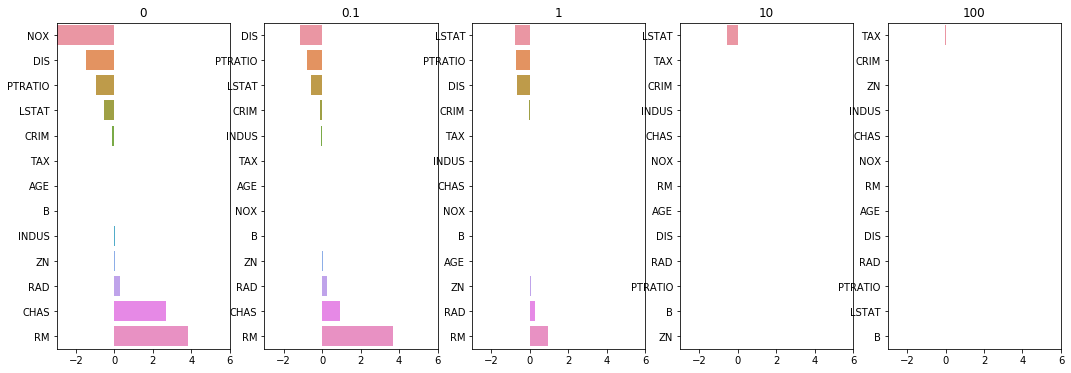

In [4]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

fig,axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
alphas = [0,0.1,1,10,100]
for i,alpha in enumerate(alphas):
    ridge = Lasso(alpha=alpha)
    ridge.fit(X_data,y_data)
    coeff = pd.Series(data=ridge.coef_,index=X_data.columns)
    
    colname = str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values()
    axs[i].set_title(colname)
    axs[i].set_xlim(-3,6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[i])

plt.show()